In [1]:
import pandas as pd
import numpy as np
import advanced_boxplot_viz as ab

In [2]:
import advanced_boxplot_viz
print(advanced_boxplot_viz.__file__)

c:\users\marcos\documents\github\advanced_boxplot_viz\advanced_boxplot_viz\__init__.py


In [3]:
print(ab.__version__)

1.0.0


In [5]:
# Leer el archivo CSV
df = pd.read_csv('./example_data_3_groups.csv') #, delimiter=';', decimal=','
df.head()

,biomarker_1,biomarker_2,biomarker_3,biomarker_4,group
0,5.496714,19.723471,106.476885,57.615149,0
1,4.765847,19.531726,115.792128,53.837174,0
2,4.530526,21.085120,95.365823,47.671351,0
3,5.241962,16.173440,82.750822,47.188562,0
4,3.987169,20.628495,90.919759,42.938481,0


In [6]:
grupo_col = "group"
biomarker_list = ["biomarker_1", "biomarker_2", "biomarker_3", "biomarker_4"]
correction_method = "fdr_bh"
normality_results = ab.check_normality(df, biomarker_list, grupo_col, correction_method)
normality_results

D’Agostino and Pearson’s test performed for group '0' of 'biomarker_1' variable.
D’Agostino and Pearson’s test performed for group '1' of 'biomarker_1' variable.
D’Agostino and Pearson’s test performed for group '2' of 'biomarker_1' variable.
D’Agostino and Pearson’s test performed for group '0' of 'biomarker_2' variable.
D’Agostino and Pearson’s test performed for group '1' of 'biomarker_2' variable.
D’Agostino and Pearson’s test performed for group '2' of 'biomarker_2' variable.
D’Agostino and Pearson’s test performed for group '0' of 'biomarker_3' variable.
D’Agostino and Pearson’s test performed for group '1' of 'biomarker_3' variable.
D’Agostino and Pearson’s test performed for group '2' of 'biomarker_3' variable.
D’Agostino and Pearson’s test performed for group '0' of 'biomarker_4' variable.
D’Agostino and Pearson’s test performed for group '1' of 'biomarker_4' variable.
D’Agostino and Pearson’s test performed for group '2' of 'biomarker_4' variable.


,0,1,2
biomarker_1,0.890570,0.890570,0.948931
biomarker_2,0.890570,0.001178,0.808097
biomarker_3,0.948931,0.344502,0.890570
biomarker_4,0.890570,0.808097,0.948931


In [7]:
grupo_col = "group"
biomarker_list = ["biomarker_1", "biomarker_2", "biomarker_3", "biomarker_4"]
correction_method = "fdr_bh"
levene_results = ab.check_variance_homogeneity(df, biomarker_list, grupo_col, correction_method)
levene_results

,Levene p-value
biomarker_1,0.107062
biomarker_2,0.984444
biomarker_3,0.984444
biomarker_4,0.984444


In [8]:
anova_results = ab.test_group_differences(df, biomarker_list, grupo_col, normality_results)
anova_results

,biomarker,test,statistic,p_value,p_value_adj
0,biomarker_1,ANOVA,1493.902123,2.120107e-98,8.480428e-98
1,biomarker_2,Kruskal-Wallis,124.372705,9.835815e-28,1.967163e-27
2,biomarker_3,ANOVA,50.712944,1.781786e-17,2.375715e-17
3,biomarker_4,ANOVA,0.688804,5.037897e-01,5.037897e-01


Running...
Plotting data between interquartiles 0.05 and 0.95
Testing biomarker biomarker_1 between groups 0 and 1
Testing biomarker biomarker_1 between groups 0 and 2
Testing biomarker biomarker_1 between groups 1 and 2
Testing biomarker biomarker_2 between groups 0 and 1
Testing biomarker biomarker_2 between groups 0 and 2
Testing biomarker biomarker_2 between groups 1 and 2
Testing biomarker biomarker_3 between groups 0 and 1
Testing biomarker biomarker_3 between groups 0 and 2
Testing biomarker biomarker_3 between groups 1 and 2
Testing biomarker biomarker_4 between groups 0 and 1
Testing biomarker biomarker_4 between groups 0 and 2
Testing biomarker biomarker_4 between groups 1 and 2


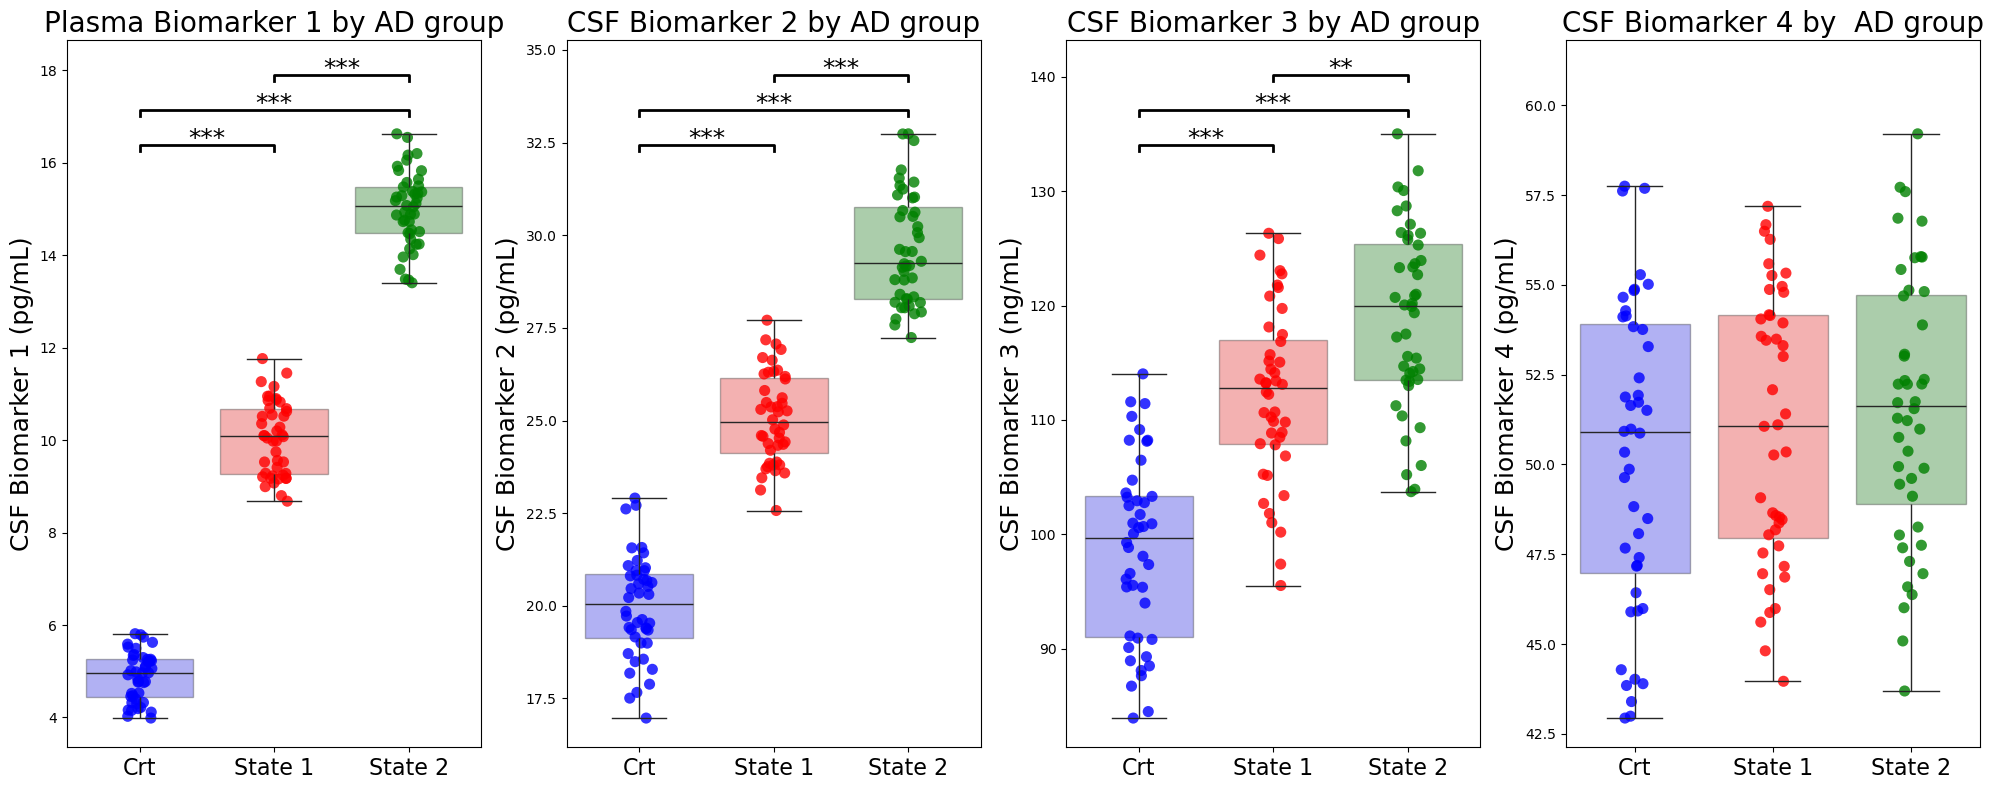

In [9]:
biomarker_title_names = {    "biomarker_1": "Plasma Biomarker 1 by AD group",
    "biomarker_2": "CSF Biomarker 2 by AD group",
    "biomarker_3": "CSF Biomarker 3 by AD group",
    "biomarker_4": "CSF Biomarker 4 by  AD group",
}

biomarker_y_axis_names = { "biomarker_1": "CSF Biomarker 1 (pg/mL)",
    "biomarker_2": "CSF Biomarker 2 (pg/mL)",
    "biomarker_3": "CSF Biomarker 3 (ng/mL)",
    "biomarker_4": "CSF Biomarker 4 (pg/mL)",

}

# Define parameters
group_col = "group"
biomarker_list = ["biomarker_1", "biomarker_2", "biomarker_3", "biomarker_4"]
palette = {0: 'blue', 1: 'red', 2: 'green'}  # Define colors for each group 
subplots_x=1
subplots_y=4
fig_size=(20, 8)
xtick_labels=["Crt", "State 1", "State 2"] 
image_name = "./boxplots.png" 
bar_height_factor = 0.06 # distancia que se deja entre barras de significancia
bar_tips_factor = 0.01 # longitud de las barras laterales de las barras de significancia
y_top_factor = -0.02 # altura de las barras de significancia sobre el fin de los violin plots
y_range_factor = 0.18 #distancia que se deja arriba de la figura
asterisk_factor = -0.01 # altura de los asteriscos sobre la barra
omnibus_test = None  # No omnibus test in this example 


ab.generate_boxplots_with_significance(
    df, group_col, biomarker_list, normality_results, palette, biomarker_title_names, biomarker_y_axis_names,
    subplots_x, subplots_y, fig_size,
    xtick_labels, image_name,
    bar_height_factor, bar_tips_factor,
    y_top_factor, y_range_factor, asterisk_factor,
    title=True, y_labels=True, correction_method="fdr_bh", p_value_format="asterisk",
    iqr_min=0.05, iqr_max=0.95, jitter_size=8, alpha=0.8, showfliers=False, omnibus_results=omnibus_test
)